In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# モザイク作成用画像の平均値のファイル
with open('mean.csv') as file:
    mean = [list(map(int, s.strip().split(","))) for s in file.readlines()]

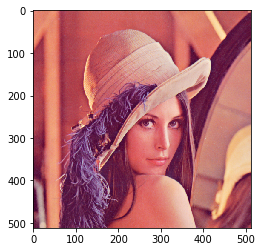

In [96]:
# 元画像読み込み
img = cv2.imread('Lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [97]:
vsize, hsize = 16, 16  # 分割後の各セルのサイズ
h, w = img.shape[:2]  # 画像の大きさ
num_vsplits, num_hsplits = np.floor_divide([h, w], [vsize, hsize])  # vsplits:縦の分割数, hsplits:横の分割数
crop_img = img[:num_vsplits * vsize, :num_hsplits * hsize]

print("height:{0}pix\nwidth :{1}pix".format(h, w))
print("縦分割数:{0}\n横分割数:{1}".format(num_vsplits, num_hsplits))

height:512pix
width :512pix
縦分割数:32
横分割数:32


In [98]:
out_imgs = []
for h_img in np.vsplit(crop_img, num_vsplits):  # 垂直方向に分割する。
    for v_img in np.hsplit(h_img, num_hsplits):  # 水平方向に分割する。
        out_imgs.append(v_img)

(16, 16, 3)
1024


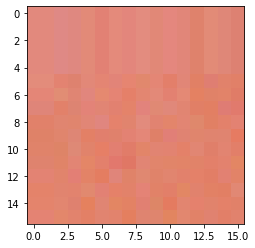

In [99]:
print(out_imgs[0].shape)
print(len(out_imgs))
plt.imshow(out_imgs[0])
plt.show()

In [100]:
anslist=[]
for i in out_imgs:
    r, g, b = cv2.split(i)
    rmean = int(r.mean())
    gmean = int(g.mean())
    bmean = int(b.mean())
    count = 114514
    ans = 0
    for x, j in enumerate(mean):
        if count > abs(j[0]-rmean)+abs(j[1]-gmean)+abs(j[2]-bmean):
            count = abs(j[0]-rmean)+abs(j[1]-gmean)+abs(j[2]-bmean)
            ans = x
    anslist.append(ans)

# 一番平均値の近い画像リスト
# print(anslist)
    
#        count = min(count, abs(j[0]-rmean)+abs(j[1]-gmean)+abs(j[2]-bmean))
    #print(ans)  

In [101]:
# モザイク作成用画像の読み込み
import keras
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

(512, 512, 3)


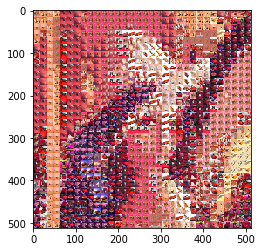

True

In [102]:
#vimg = x_train[anslist[0]]

# 一行目の画像
for i in range(num_hsplits):
    if i==0: #初回だけ直接入れる
        vimg = x_train[anslist[0]]
    else:
        vimg = cv2.hconcat([vimg, x_train[anslist[i]]]) #横結合

# 二行目以降の画像
for i in range(1, num_vsplits):
    for j in range(num_hsplits):
        if j==0:
            vimg2 = x_train[anslist[i*num_hsplits]]
        else:
            vimg2 = cv2.hconcat([vimg2, x_train[anslist[i*num_hsplits+j]]]) #横結合
    vimg = cv2.vconcat([vimg, vimg2]) #縦結合

#for i, j in enumerate(anslist[1:]):
#    vimg = np.hstack((vimg, x_train[j]))
#vimg=np.reshape(vimg, (hsize, vsize*num_vsplits, num_hsplits, 3))#vsize*num_vsplits, hsize*num_hsplits, 3)
        
#vimg=np.reshape(vimg, (vsize*num_vsplits, hsize*num_hsplits, 3))
#    if i+1%num_vsplits == 0:

vimg = cv2.resize(vimg, dsize=(h, w)) #元画像と同じサイズにリサイズ

print(vimg.shape)
plt.imshow(vimg)
plt.show()

vimg = cv2.cvtColor(vimg, cv2.COLOR_RGB2BGR)
cv2.imwrite('mosaic.jpg', vimg) #画像保存